In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
sys.path.append('./')

from theory import _compute_bias_variance, compute_test_error_parameterized, compute_test_error
from target_function import PolynomialFunction
from activation import PolynomialActivation
%load_ext autoreload
%autoreload 2
%matplotlib inline

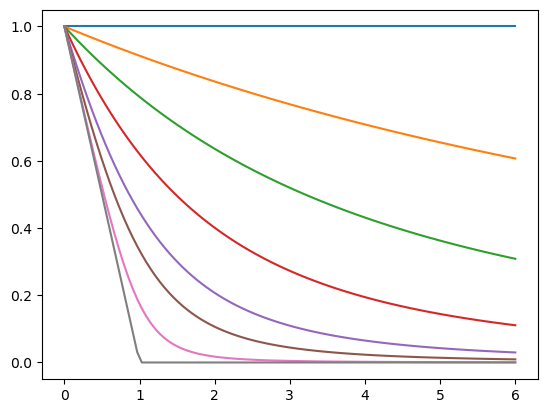

In [2]:
rho = np.array([0, 0.05, 0.15, 0.4, 1, 2, 8, 100000])
delta_K = np.linspace(0, 6, 100)
bias = _compute_bias_variance(rho[:, np.newaxis], delta_K[np.newaxis, :])['Bh']
for i in range(len(rho)):
    plt.plot(delta_K, bias[i])
plt.show()

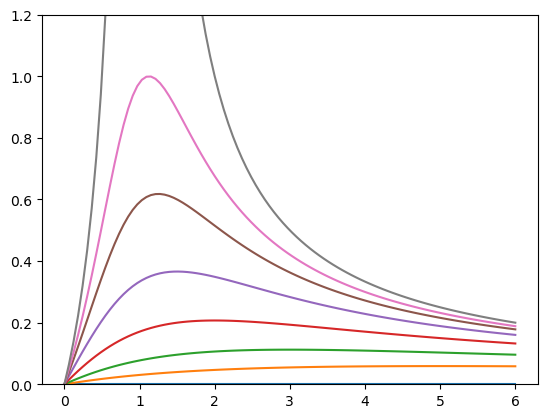

In [3]:
rho = np.array([0, 0.25, 0.5, 1, 2, 4, 8, 10e10])
delta_K = np.linspace(0, 6, 100)
var = _compute_bias_variance(rho[:, np.newaxis], delta_K[np.newaxis, :])['Vh']
for i in range(len(rho)):
    plt.plot(delta_K, var[i])
plt.ylim(0,1.2)
plt.show()

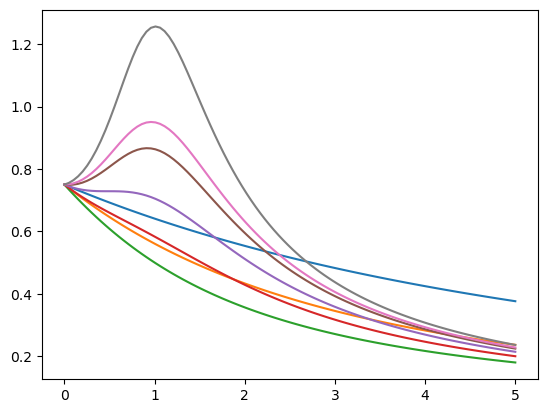

In [4]:
snr = 0.75
rho = np.array([0.1, 0.25, 0.75, 2, 3.2792, 5, 6, 10])
delta_K = np.linspace(0, 5, 100)
etest = compute_test_error_parameterized(snr, rho[:, np.newaxis], delta_K[np.newaxis, :])['Etest']
for i in range(len(rho)):
    plt.plot(delta_K, etest[i])
plt.show()

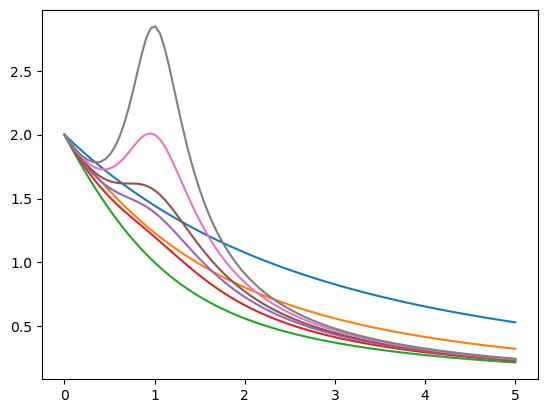

In [5]:
snr = 2
rho = np.array([0.25, 0.5, 2, 6, 9, 11.8878, 20, 40])
delta_K = np.linspace(0, 5, 100)
etest = compute_test_error_parameterized(snr, rho[:, np.newaxis], delta_K[np.newaxis, :])['Etest']
for i in range(len(rho)):
    plt.plot(delta_K, etest[i])
plt.show()

In [2]:
from target_function import PolynomialFunction
from activation import PolynomialActivation

g_fn = PolynomialFunction([0, 1, 1, 0.5, 0.05])
activ = PolynomialActivation([0.5, 1. - 1 / (2 * 5 ** 0.5), 0.5, 1. / (6 * 5 ** 0.5)])

sigma_W2 = 1
for i in range(5):
    print('####')
    print('K =', i)
    print('a^2_K, like in my derivations', activ.get_hermite_coef_sqr(i, scaled=True, sigma_W2=sigma_W2))
    print('a^2_K, divided by 1/K!', activ.get_hermite_coef_sqr(i, scaled=False, sigma_W2=sigma_W2))
    print('sum_{k = K} a^2_k, like in my derivations', activ.get_hermite_coef_sqr_remainder(i, scaled=True, sigma_W2=sigma_W2))
    print('sum_{k = K} a^2_k, divided by 1/(K-1)!', activ.get_hermite_coef_sqr_remainder(i, scaled=False, sigma_W2=sigma_W2))
    print('--')
    print('alpha^2_K, like in my derivations', g_fn.get_hermite_coef_sqr(i, scaled=True))
    print('alpha^2_K, divided by 1/K!', g_fn.get_hermite_coef_sqr(i, scaled=False))
    print('sum_{k = K} alpha^2_k, like in my derivations', g_fn.get_hermite_coef_sqr_remainder(i, scaled=True))
    print('sum_{k = K} alpha^2_k, divided by 1/(K-1)!', g_fn.get_hermite_coef_sqr_remainder(i, scaled=False))
    print('--')
    if i > 0:
        print('lreg_K', activ.get_lambda_crit(i))


K = 1
sigma_z = 0.5
lreg = 1e-4
# print(g_fn)
# compute_test_error()

####
K = 0
a^2_K, like in my derivations 1.0
a^2_K, divided by 1/K! 1.0
sum_{k = K} a^2_k, like in my derivations 4.633333
sum_{k = K} a^2_k, divided by 1/(K-1)! 4.633333
--
alpha^2_K, like in my derivations 1.3225
alpha^2_K, divided by 1/K! 1.3225
sum_{k = K} alpha^2_k, like in my derivations 12.5125
sum_{k = K} alpha^2_k, divided by 1/(K-1)! 12.5125
--
####
K = 1
a^2_K, like in my derivations 2.0
a^2_K, divided by 1/K! 2.0
sum_{k = K} a^2_k, like in my derivations 3.6333334
sum_{k = K} a^2_k, divided by 1/(K-1)! 3.6333334
--
alpha^2_K, like in my derivations 6.25
alpha^2_K, divided by 1/K! 6.25
sum_{k = K} alpha^2_k, like in my derivations 11.189999
sum_{k = K} alpha^2_k, divided by 1/(K-1)! 11.189999
--
lreg_K 0.56666666
####
K = 2
a^2_K, like in my derivations 1.5
a^2_K, divided by 1/K! 0.75
sum_{k = K} a^2_k, like in my derivations 1.6333333
sum_{k = K} a^2_k, divided by 1/(K-1)! 1.6333333
--
alpha^2_K, like in my derivations 3.3799996
alpha^2_K, divided by 1/K! 1.6899998
sum_{k =

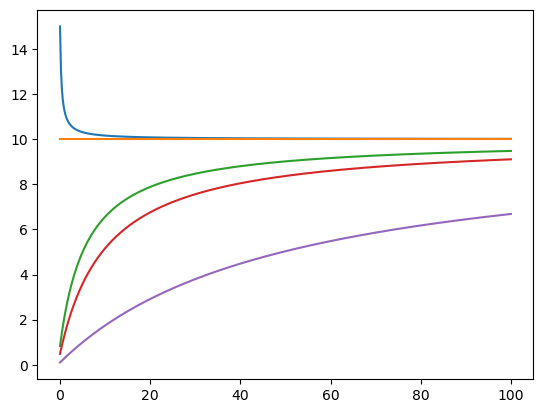

In [4]:
lreg = np.array([0, 0.01666667, 0.56666654, 1, 5])
sigma_W2 = np.linspace(0, 100, 500)
rhos = activ.rho(2, sigma_W2=np.sqrt(sigma_W2), lreg=lreg)
for i in range(rhos.shape[1]):
    plt.plot(sigma_W2, rhos[:, i])
plt.show()

In [5]:
activ.rho_K1(2), activ.rho_K2(2), rhos[0, 0], rhos[:, 1][:3]

(Array(9.999999, dtype=float32),
 Array(14.999999, dtype=float32),
 Array(14.999999, dtype=float32),
 Array([9.999999, 9.999999, 9.999999], dtype=float32))

In [6]:
activ.get_hermite_coef_sqr_remainder(i, scaled=True, sigma_W2=1)

Array(0., dtype=float32)

In [7]:
k = 1
g_fn.SNR(k, sigma_z=np.array([0, 1, 2, 3]))
g_fn.SNR(k, sigma_z=0)

Array(1.2651823, dtype=float32)

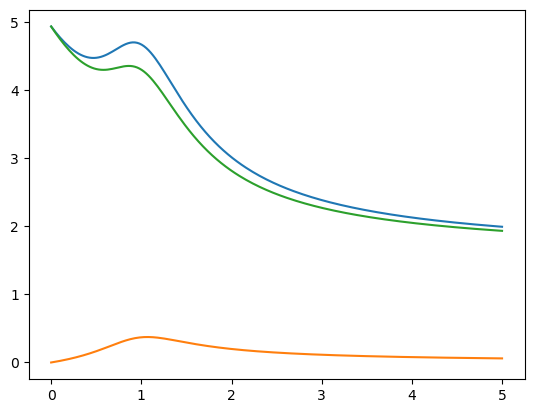

In [10]:
g_fn = PolynomialFunction([0, 1, 1, 0.5, 0.05])
activ = PolynomialActivation([0.5, 1. - 1 / (2 * 5 ** 0.5), 0.5, 1. / (6 * 5 ** 0.5)])
K = 2
sigma_z = 0.5
delta_K = np.linspace(0, 5, 200)
sigma_W2 = 0.
lreg = 1e-4
err = compute_test_error(g_fn, activ, K, delta_K, sigma_z, sigma_W2, lreg)
plt.plot(delta_K, err['Etest'], label='Etest')
plt.plot(delta_K, err['Vh'], label='Variance')
plt.plot(delta_K, err['Bh_K'] + err['Bh_gK'], label='Bias')
plt.show()

In [14]:
compute_test_error(g_fn, activ, 2, 0.5, np.arange(8), np.arange(9), np.arange(10))['Bh_K'].shape

(8, 9, 10)

In [12]:
A = np.arange(5)[:, np.newaxis]
B = np.arange(10)
tuple([*A.shape, *B.shape])

(5, 1, 10)